### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Carrega imagens de treino e teste com tamanho 512px.

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')
#------------------------------------------------------------------------------------------------------------
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

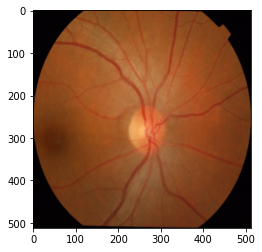

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
green_channel_train = get_color_channel(1, img_train)
len(green_channel_train)

50

### Test images

In [5]:
green_channel_test = get_color_channel(1, img_test)
len(green_channel_test)

51

#### Generator of augmented data:

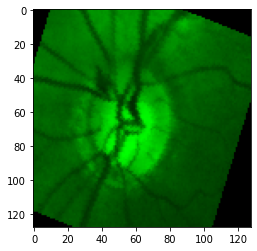

In [6]:
gen = data_generator(green_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(np.squeeze(batch[0][0]))

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(green_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
len(X_test), len(Y_test)

(51, 51)

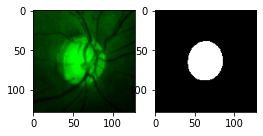

In [8]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [9]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(green_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_green', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 42s 398ms/step - loss: 1.5765 - mean_IOU_gpu: 0.1223 - dice_metric: 0.2078 - val_loss: 1.4536 - val_mean_IOU_gpu: 0.3637 - val_dice_metric: 0.5134
Epoch 2/500
99/99 [==============================] - 41s 415ms/step - loss: 1.5241 - mean_IOU_gpu: 0.2190 - dice_metric: 0.3458 - val_loss: 1.4156 - val_mean_IOU_gpu: 0.0122 - val_dice_metric: 0.0229
Epoch 3/500
99/99 [==============================] - 42s 420ms/step - loss: 1.4877 - mean_IOU_gpu: 0.2145 - dice_metric: 0.3477 - val_loss: 1.3602 - val_mean_IOU_gpu: 0.0515 - val_dice_metric: 0.0886
Epoch 4/500
99/99 [==============================] - 41s 416ms/step - loss: 1.4400 - mean_IOU_gpu: 0.2765 - dice_metric: 0.4171 - val_loss: 1.2690 - val_mean_IOU_gpu: 0.2609 - val_dice_metric: 0.3965
Epoch 5/500
99/99 [==============================] - 40s 404ms/step - loss: 1.2695 - mean_IOU_gpu: 0.3372 - dice_metric: 0.4852 - val_loss: 1.1586 - val_mean_IOU_gpu: 0.3232 - val_dice_metric: 0.4689


Epoch 42/500
99/99 [==============================] - 40s 403ms/step - loss: 0.2423 - mean_IOU_gpu: 0.6574 - dice_metric: 0.7721 - val_loss: 0.5926 - val_mean_IOU_gpu: 0.3410 - val_dice_metric: 0.4769
Epoch 43/500
99/99 [==============================] - 40s 405ms/step - loss: 0.1795 - mean_IOU_gpu: 0.6969 - dice_metric: 0.8108 - val_loss: 0.7364 - val_mean_IOU_gpu: 0.2846 - val_dice_metric: 0.4006
Epoch 44/500
99/99 [==============================] - 40s 403ms/step - loss: 0.2190 - mean_IOU_gpu: 0.6680 - dice_metric: 0.7839 - val_loss: 1.1458 - val_mean_IOU_gpu: 0.1496 - val_dice_metric: 0.2306
Epoch 45/500
99/99 [==============================] - 40s 406ms/step - loss: 0.2102 - mean_IOU_gpu: 0.6663 - dice_metric: 0.7874 - val_loss: 0.5799 - val_mean_IOU_gpu: 0.3468 - val_dice_metric: 0.4787
Epoch 46/500
99/99 [==============================] - 40s 405ms/step - loss: 0.2498 - mean_IOU_gpu: 0.6275 - dice_metric: 0.7546 - val_loss: 0.3721 - val_mean_IOU_gpu: 0.4830 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 40s 404ms/step - loss: 0.1512 - mean_IOU_gpu: 0.7319 - dice_metric: 0.8370 - val_loss: 0.2326 - val_mean_IOU_gpu: 0.6173 - val_dice_metric: 0.7526
Epoch 84/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1456 - mean_IOU_gpu: 0.7317 - dice_metric: 0.8383 - val_loss: 0.3899 - val_mean_IOU_gpu: 0.4814 - val_dice_metric: 0.6301
Epoch 85/500
99/99 [==============================] - 40s 408ms/step - loss: 0.1547 - mean_IOU_gpu: 0.7284 - dice_metric: 0.8334 - val_loss: 0.2389 - val_mean_IOU_gpu: 0.6097 - val_dice_metric: 0.7457
Epoch 86/500
99/99 [==============================] - 40s 399ms/step - loss: 0.1742 - mean_IOU_gpu: 0.7034 - dice_metric: 0.8150 - val_loss: 0.5142 - val_mean_IOU_gpu: 0.3854 - val_dice_metric: 0.5227
Epoch 87/500
99/99 [==============================] - 39s 398ms/step - loss: 0.2496 - mean_IOU_gpu: 0.6477 - dice_metric: 0.7648 - val_loss: 0.3532 - val_mean_IOU_gpu: 0.4937 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 40s 408ms/step - loss: 0.1534 - mean_IOU_gpu: 0.7171 - dice_metric: 0.8283 - val_loss: 0.1979 - val_mean_IOU_gpu: 0.6538 - val_dice_metric: 0.7816
Epoch 125/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1285 - mean_IOU_gpu: 0.7524 - dice_metric: 0.8534 - val_loss: 0.2758 - val_mean_IOU_gpu: 0.5772 - val_dice_metric: 0.7206
Epoch 126/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1416 - mean_IOU_gpu: 0.7402 - dice_metric: 0.8431 - val_loss: 0.2567 - val_mean_IOU_gpu: 0.5967 - val_dice_metric: 0.7369
Epoch 127/500
99/99 [==============================] - 41s 410ms/step - loss: 0.1410 - mean_IOU_gpu: 0.7310 - dice_metric: 0.8392 - val_loss: 0.1693 - val_mean_IOU_gpu: 0.6882 - val_dice_metric: 0.8068
Epoch 128/500
99/99 [==============================] - 41s 411ms/step - loss: 0.1533 - mean_IOU_gpu: 0.7281 - dice_metric: 0.8340 - val_loss: 0.7957 - val_mean_IOU_gpu: 0.2568 - val_dice_metri

99/99 [==============================] - 39s 396ms/step - loss: 0.1348 - mean_IOU_gpu: 0.7459 - dice_metric: 0.8470 - val_loss: 0.1934 - val_mean_IOU_gpu: 0.6627 - val_dice_metric: 0.7893
Epoch 165/500
99/99 [==============================] - 40s 402ms/step - loss: 0.1494 - mean_IOU_gpu: 0.7372 - dice_metric: 0.8389 - val_loss: 0.1955 - val_mean_IOU_gpu: 0.6592 - val_dice_metric: 0.7870
Epoch 166/500
99/99 [==============================] - 39s 395ms/step - loss: 0.0963 - mean_IOU_gpu: 0.7959 - dice_metric: 0.8836 - val_loss: 0.2306 - val_mean_IOU_gpu: 0.6256 - val_dice_metric: 0.7602
Epoch 167/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1339 - mean_IOU_gpu: 0.7422 - dice_metric: 0.8458 - val_loss: 0.1931 - val_mean_IOU_gpu: 0.6637 - val_dice_metric: 0.7894
Epoch 168/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1422 - mean_IOU_gpu: 0.7461 - dice_metric: 0.8452 - val_loss: 0.2545 - val_mean_IOU_gpu: 0.5986 - val_dice_metric: 0.7402
Epoc

Epoch 205/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1278 - mean_IOU_gpu: 0.7492 - dice_metric: 0.8516 - val_loss: 0.2528 - val_mean_IOU_gpu: 0.5981 - val_dice_metric: 0.7395
Epoch 206/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1188 - mean_IOU_gpu: 0.7598 - dice_metric: 0.8587 - val_loss: 0.2559 - val_mean_IOU_gpu: 0.5959 - val_dice_metric: 0.7378
Epoch 207/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1414 - mean_IOU_gpu: 0.7401 - dice_metric: 0.8428 - val_loss: 0.2068 - val_mean_IOU_gpu: 0.6446 - val_dice_metric: 0.7764
Epoch 208/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1154 - mean_IOU_gpu: 0.7681 - dice_metric: 0.8650 - val_loss: 0.2040 - val_mean_IOU_gpu: 0.6494 - val_dice_metric: 0.7800
Epoch 209/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1480 - mean_IOU_gpu: 0.7386 - dice_metric: 0.8383 - val_loss: 0.4718 - val_mean_IOU_gpu: 0.4351 - val_dice_metri

99/99 [==============================] - 39s 390ms/step - loss: 0.1169 - mean_IOU_gpu: 0.7669 - dice_metric: 0.8632 - val_loss: 0.2843 - val_mean_IOU_gpu: 0.5681 - val_dice_metric: 0.7136
Epoch 246/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1404 - mean_IOU_gpu: 0.7411 - dice_metric: 0.8429 - val_loss: 0.3724 - val_mean_IOU_gpu: 0.4969 - val_dice_metric: 0.6482
Epoch 247/500
99/99 [==============================] - 39s 391ms/step - loss: 0.1144 - mean_IOU_gpu: 0.7633 - dice_metric: 0.8624 - val_loss: 0.4148 - val_mean_IOU_gpu: 0.4627 - val_dice_metric: 0.6159
Epoch 248/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1047 - mean_IOU_gpu: 0.7829 - dice_metric: 0.8749 - val_loss: 0.3400 - val_mean_IOU_gpu: 0.5157 - val_dice_metric: 0.6685
Epoch 249/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1256 - mean_IOU_gpu: 0.7635 - dice_metric: 0.8579 - val_loss: 0.2025 - val_mean_IOU_gpu: 0.6484 - val_dice_metric: 0.7784
Epoc

Epoch 286/500
99/99 [==============================] - 39s 397ms/step - loss: 0.1158 - mean_IOU_gpu: 0.7677 - dice_metric: 0.8638 - val_loss: 0.1980 - val_mean_IOU_gpu: 0.6485 - val_dice_metric: 0.7787
Epoch 287/500
99/99 [==============================] - 40s 401ms/step - loss: 0.1053 - mean_IOU_gpu: 0.7792 - dice_metric: 0.8729 - val_loss: 0.2450 - val_mean_IOU_gpu: 0.6016 - val_dice_metric: 0.7415
Epoch 288/500
99/99 [==============================] - 40s 404ms/step - loss: 0.1227 - mean_IOU_gpu: 0.7604 - dice_metric: 0.8579 - val_loss: 0.2054 - val_mean_IOU_gpu: 0.6421 - val_dice_metric: 0.7730
Epoch 289/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1364 - mean_IOU_gpu: 0.7335 - dice_metric: 0.8405 - val_loss: 0.2168 - val_mean_IOU_gpu: 0.6290 - val_dice_metric: 0.7642
Epoch 290/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1429 - mean_IOU_gpu: 0.7443 - dice_metric: 0.8424 - val_loss: 0.2531 - val_mean_IOU_gpu: 0.5842 - val_dice_metri

99/99 [==============================] - 39s 390ms/step - loss: 0.1177 - mean_IOU_gpu: 0.7664 - dice_metric: 0.8621 - val_loss: 0.2259 - val_mean_IOU_gpu: 0.6244 - val_dice_metric: 0.7596
Epoch 327/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1058 - mean_IOU_gpu: 0.7817 - dice_metric: 0.8731 - val_loss: 0.2012 - val_mean_IOU_gpu: 0.6498 - val_dice_metric: 0.7799
Epoch 328/500
99/99 [==============================] - 38s 386ms/step - loss: 0.1192 - mean_IOU_gpu: 0.7700 - dice_metric: 0.8641 - val_loss: 0.2415 - val_mean_IOU_gpu: 0.6070 - val_dice_metric: 0.7465
Epoch 329/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1250 - mean_IOU_gpu: 0.7615 - dice_metric: 0.8572 - val_loss: 0.2345 - val_mean_IOU_gpu: 0.6151 - val_dice_metric: 0.7529
Epoch 330/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1104 - mean_IOU_gpu: 0.7743 - dice_metric: 0.8684 - val_loss: 0.2557 - val_mean_IOU_gpu: 0.5901 - val_dice_metric: 0.7333
Epoc

Epoch 367/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1134 - mean_IOU_gpu: 0.7742 - dice_metric: 0.8679 - val_loss: 0.1862 - val_mean_IOU_gpu: 0.6675 - val_dice_metric: 0.7927
Epoch 368/500
99/99 [==============================] - 38s 387ms/step - loss: 0.1085 - mean_IOU_gpu: 0.7820 - dice_metric: 0.8721 - val_loss: 0.2732 - val_mean_IOU_gpu: 0.5790 - val_dice_metric: 0.7216
Epoch 369/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1079 - mean_IOU_gpu: 0.7758 - dice_metric: 0.8698 - val_loss: 0.2163 - val_mean_IOU_gpu: 0.6358 - val_dice_metric: 0.7677
Epoch 370/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1285 - mean_IOU_gpu: 0.7513 - dice_metric: 0.8513 - val_loss: 0.1776 - val_mean_IOU_gpu: 0.6765 - val_dice_metric: 0.7990
Epoch 371/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1039 - mean_IOU_gpu: 0.7829 - dice_metric: 0.8744 - val_loss: 0.1905 - val_mean_IOU_gpu: 0.6582 - val_dice_metri

99/99 [==============================] - 40s 404ms/step - loss: 0.1163 - mean_IOU_gpu: 0.7632 - dice_metric: 0.8611 - val_loss: 0.2641 - val_mean_IOU_gpu: 0.5748 - val_dice_metric: 0.7193
Epoch 408/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1046 - mean_IOU_gpu: 0.7809 - dice_metric: 0.8735 - val_loss: 0.1897 - val_mean_IOU_gpu: 0.6566 - val_dice_metric: 0.7848
Epoch 409/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1160 - mean_IOU_gpu: 0.7660 - dice_metric: 0.8633 - val_loss: 0.1830 - val_mean_IOU_gpu: 0.6657 - val_dice_metric: 0.7915
Epoch 410/500
99/99 [==============================] - 39s 389ms/step - loss: 0.1102 - mean_IOU_gpu: 0.7753 - dice_metric: 0.8689 - val_loss: 0.1727 - val_mean_IOU_gpu: 0.6798 - val_dice_metric: 0.8018
Epoch 411/500
99/99 [==============================] - 39s 393ms/step - loss: 0.0998 - mean_IOU_gpu: 0.7864 - dice_metric: 0.8774 - val_loss: 0.3244 - val_mean_IOU_gpu: 0.5259 - val_dice_metric: 0.6760
Epoc

Epoch 448/500
99/99 [==============================] - 39s 397ms/step - loss: 0.1087 - mean_IOU_gpu: 0.7750 - dice_metric: 0.8691 - val_loss: 0.1860 - val_mean_IOU_gpu: 0.6603 - val_dice_metric: 0.7871
Epoch 449/500
99/99 [==============================] - 38s 385ms/step - loss: 0.1176 - mean_IOU_gpu: 0.7633 - dice_metric: 0.8608 - val_loss: 0.2086 - val_mean_IOU_gpu: 0.6342 - val_dice_metric: 0.7669
Epoch 450/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1023 - mean_IOU_gpu: 0.7855 - dice_metric: 0.8763 - val_loss: 0.1781 - val_mean_IOU_gpu: 0.6731 - val_dice_metric: 0.7965
Epoch 451/500
99/99 [==============================] - 39s 391ms/step - loss: 0.1196 - mean_IOU_gpu: 0.7716 - dice_metric: 0.8618 - val_loss: 0.1834 - val_mean_IOU_gpu: 0.6649 - val_dice_metric: 0.7907
Epoch 452/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1131 - mean_IOU_gpu: 0.7694 - dice_metric: 0.8654 - val_loss: 0.1916 - val_mean_IOU_gpu: 0.6559 - val_dice_metri

99/99 [==============================] - 39s 392ms/step - loss: 0.0951 - mean_IOU_gpu: 0.8000 - dice_metric: 0.8851 - val_loss: 0.2209 - val_mean_IOU_gpu: 0.6256 - val_dice_metric: 0.7604
Epoch 489/500
99/99 [==============================] - 39s 395ms/step - loss: 0.0882 - mean_IOU_gpu: 0.8078 - dice_metric: 0.8915 - val_loss: 0.1762 - val_mean_IOU_gpu: 0.6771 - val_dice_metric: 0.7998
Epoch 490/500
99/99 [==============================] - 35s 349ms/step - loss: 0.1069 - mean_IOU_gpu: 0.7816 - dice_metric: 0.8730 - val_loss: 0.2091 - val_mean_IOU_gpu: 0.6386 - val_dice_metric: 0.7707
Epoch 491/500
99/99 [==============================] - 36s 365ms/step - loss: 0.1136 - mean_IOU_gpu: 0.7682 - dice_metric: 0.8645 - val_loss: 0.1750 - val_mean_IOU_gpu: 0.6805 - val_dice_metric: 0.8020
Epoch 492/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1193 - mean_IOU_gpu: 0.7666 - dice_metric: 0.8618 - val_loss: 0.2078 - val_mean_IOU_gpu: 0.6414 - val_dice_metric: 0.7722
Epoc

### Visual check

image #0


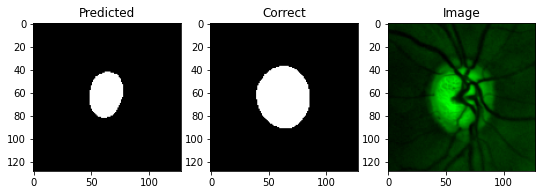

IOU: 0.46989190578460693
Dice: 0.6393557422969187
image #1


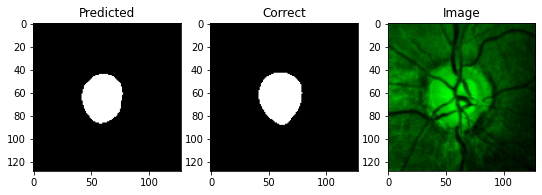

IOU: 0.8739495873451233
Dice: 0.9327354260089686
image #2


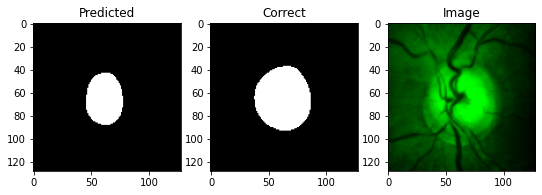

IOU: 0.5463049411773682
Dice: 0.7065940713853599
image #3


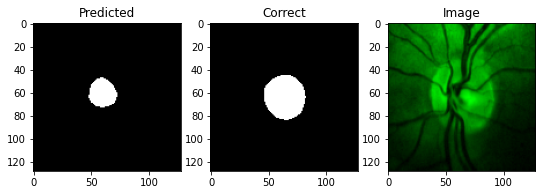

IOU: 0.43819189071655273
Dice: 0.6093649775497113
image #4


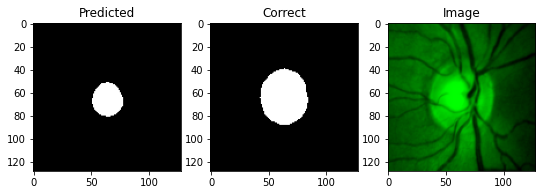

IOU: 0.39074549078941345
Dice: 0.5619223659889094
image #5


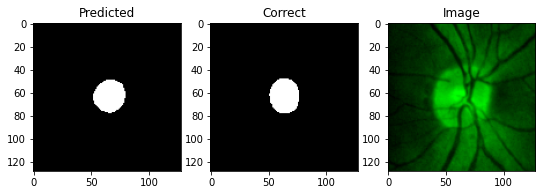

IOU: 0.8262150287628174
Dice: 0.9048387096774193
image #6


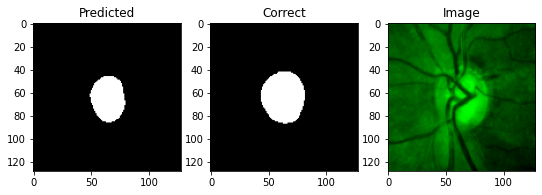

IOU: 0.6977611780166626
Dice: 0.8219780219780219
image #7


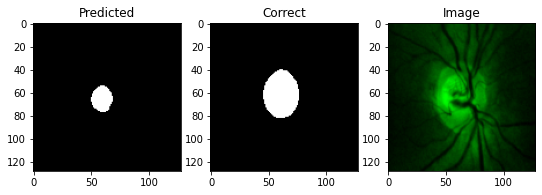

IOU: 0.3226773142814636
Dice: 0.4879154078549849
image #8


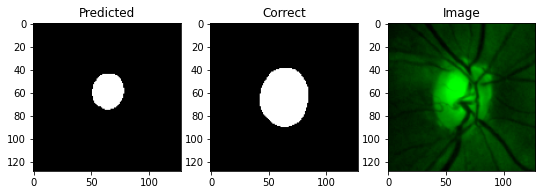

IOU: 0.39941176772117615
Dice: 0.5708280790248004
image #9


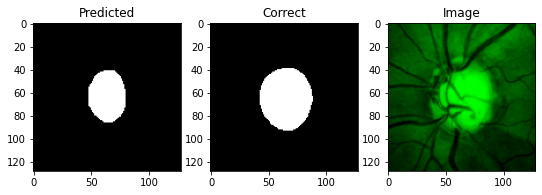

IOU: 0.6016511917114258
Dice: 0.7512886597938144
image #10


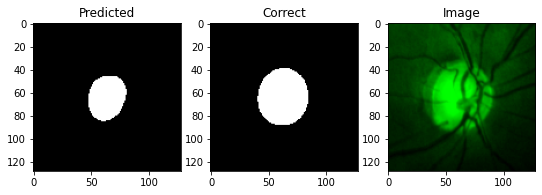

IOU: 0.588921308517456
Dice: 0.7412844036697248
image #11


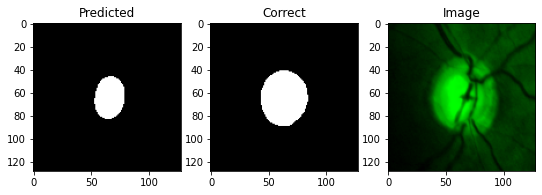

IOU: 0.4957764744758606
Dice: 0.6629018245004344
image #12


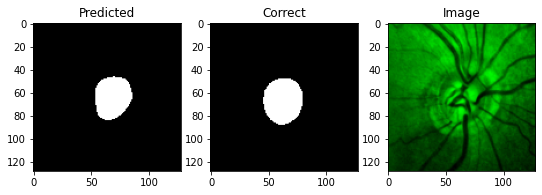

IOU: 0.6229116916656494
Dice: 0.7676470588235295
image #13


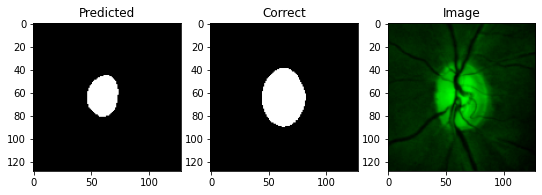

IOU: 0.5136239528656006
Dice: 0.6786678667866787
image #14


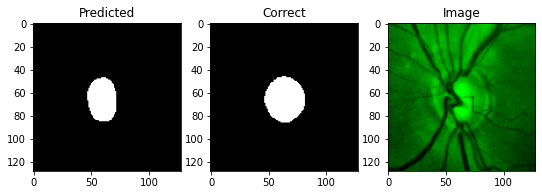

IOU: 0.6648648381233215
Dice: 0.7987012987012987
image #15


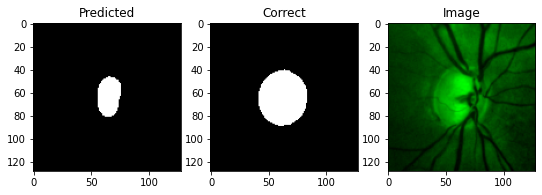

IOU: 0.35508155822753906
Dice: 0.524074074074074
image #16


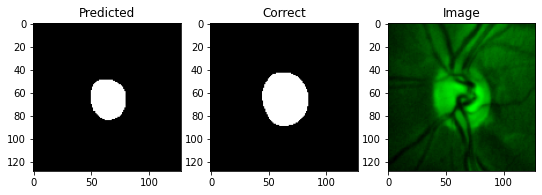

IOU: 0.5877550840377808
Dice: 0.7403598971722365
image #17


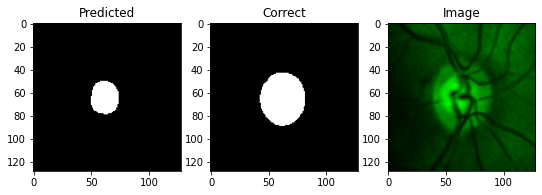

IOU: 0.4004252254962921
Dice: 0.5718623481781376
image #18


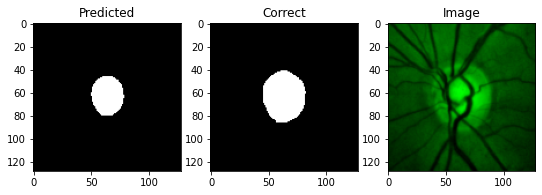

IOU: 0.5925639271736145
Dice: 0.7441634241245136
image #19


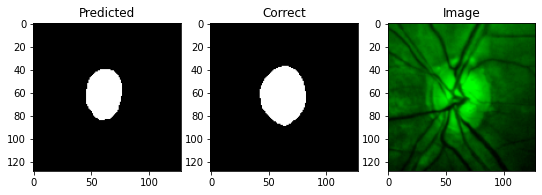

IOU: 0.7019354701042175
Dice: 0.8248673237300985
image #20


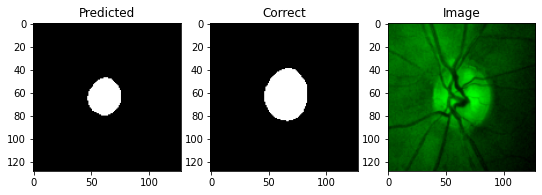

IOU: 0.5482890009880066
Dice: 0.7082514734774067
image #21


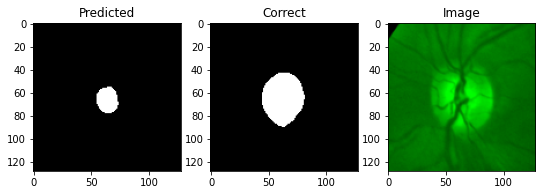

IOU: 0.26656273007392883
Dice: 0.4209230769230769
image #22


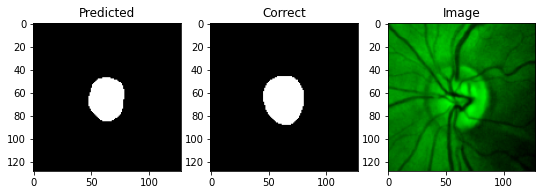

IOU: 0.7961083054542542
Dice: 0.886481394253415
image #23


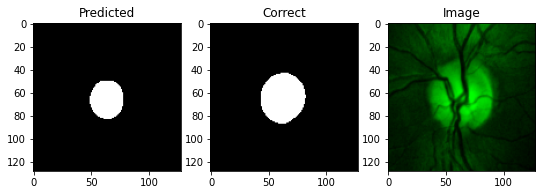

IOU: 0.588012158870697
Dice: 0.7405637840420449
image #24


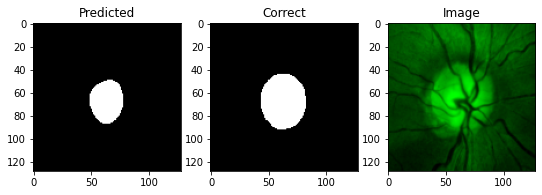

IOU: 0.5755347609519958
Dice: 0.7305897327110734
image #25


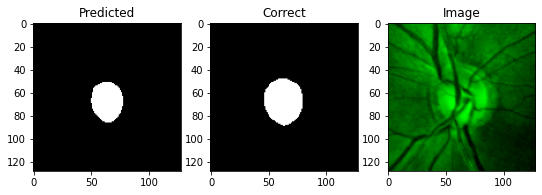

IOU: 0.7175355553627014
Dice: 0.8355408388520972
image #26


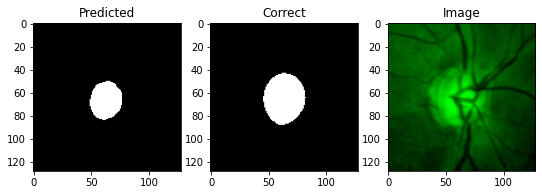

IOU: 0.5834004878997803
Dice: 0.7368956743002545
image #27


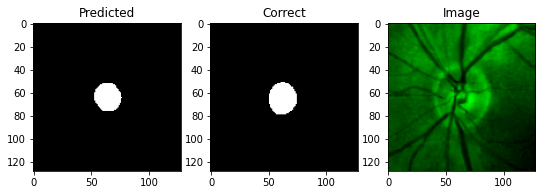

IOU: 0.7679855823516846
Dice: 0.8687690742624619
image #28


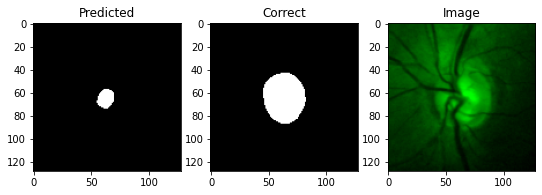

IOU: 0.15158730745315552
Dice: 0.26326671261199175
image #29


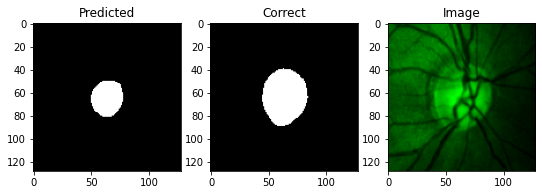

IOU: 0.46657663583755493
Dice: 0.6362799263351749
image #30


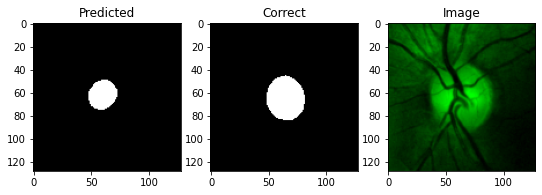

IOU: 0.4831683039665222
Dice: 0.6515353805073432
image #31


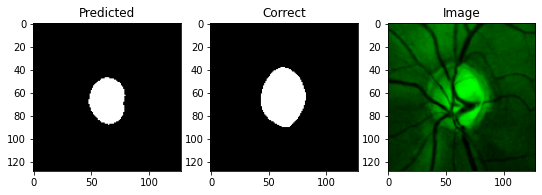

IOU: 0.6509308218955994
Dice: 0.7885622231171969
image #32


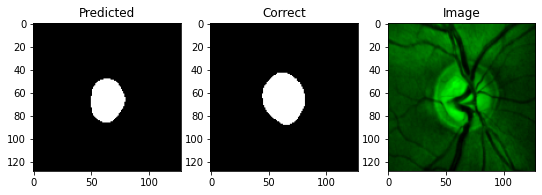

IOU: 0.6995192170143127
Dice: 0.8231966053748232
image #33


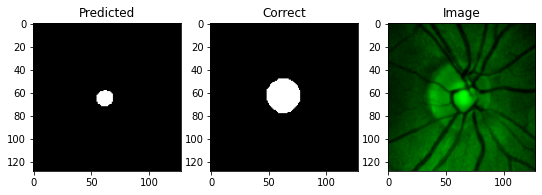

IOU: 0.23099415004253387
Dice: 0.3752969121140142
image #34


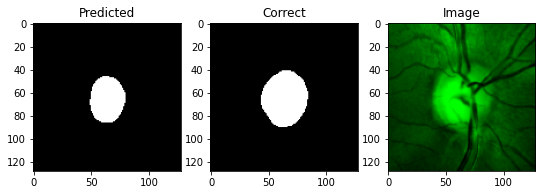

IOU: 0.6441798806190491
Dice: 0.7835880933226066
image #35


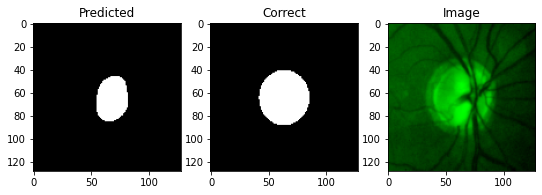

IOU: 0.5343558192253113
Dice: 0.6965213914434226
image #36


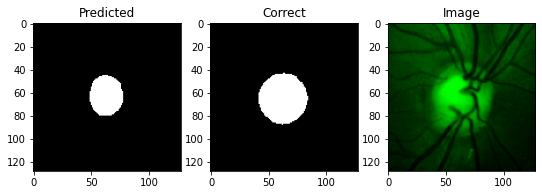

IOU: 0.5596140623092651
Dice: 0.7176314626601856
image #37


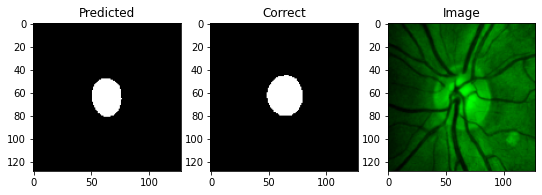

IOU: 0.772357702255249
Dice: 0.8715596330275229
image #38


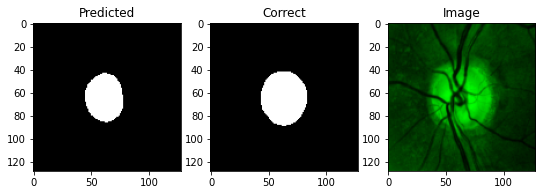

IOU: 0.740715742111206
Dice: 0.8510473235065943
image #39


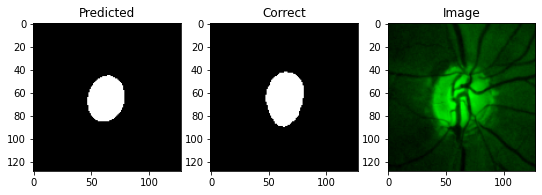

IOU: 0.7909836173057556
Dice: 0.8832951945080092
image #40


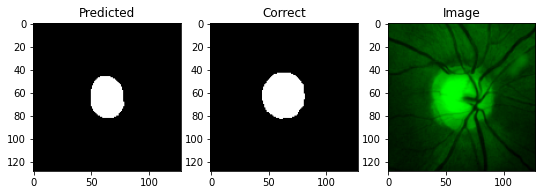

IOU: 0.7284372448921204
Dice: 0.8428853754940712
image #41


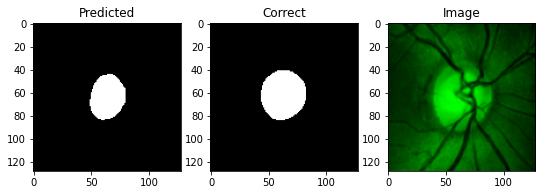

IOU: 0.7100903391838074
Dice: 0.8304711580801409
image #42


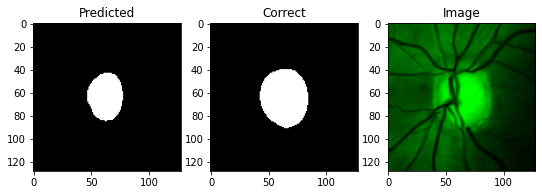

IOU: 0.6014405488967896
Dice: 0.7511244377811095
image #43


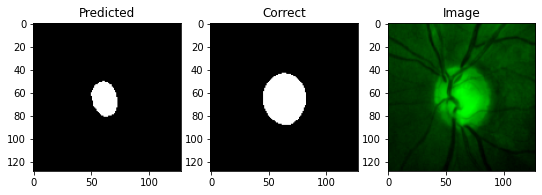

IOU: 0.4060324728488922
Dice: 0.5775577557755776
image #44


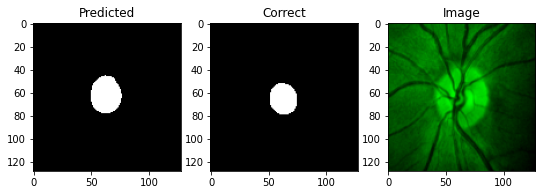

IOU: 0.6964539289474487
Dice: 0.8210702341137124
image #45


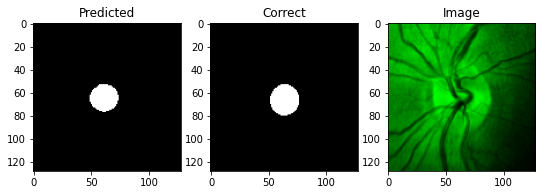

IOU: 0.6768189668655396
Dice: 0.8072653884964682
image #46


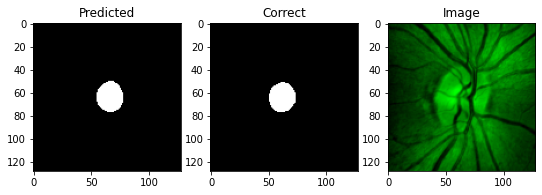

IOU: 0.6207482814788818
Dice: 0.7660020986358866
image #47


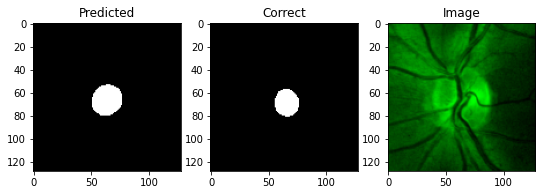

IOU: 0.6275510191917419
Dice: 0.7711598746081505
image #48


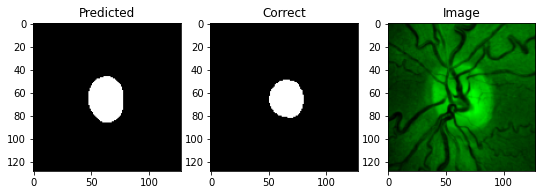

IOU: 0.7027290463447571
Dice: 0.8254149971379507
image #49


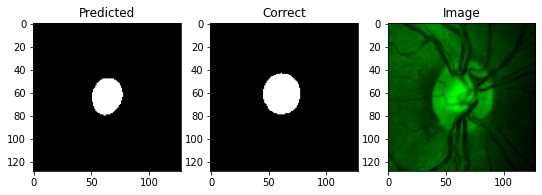

IOU: 0.7264673113822937
Dice: 0.841565105837075
image #50


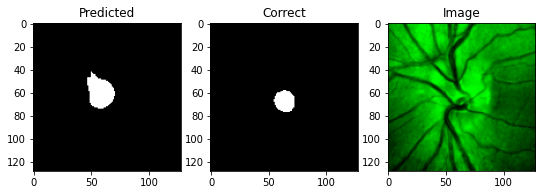

IOU: 0.28358209133148193
Dice: 0.4418604651162791


In [10]:
pred_iou, pred_dice, pred_cup = predict(green_channel_test, X_test, Y_test, model, img_size)

In [11]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.57724357
0.7174024270538581


Acquiring scores for the validation set:

### Training and Test disc

In [12]:
X_test, Z_test = next(data_generator(green_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

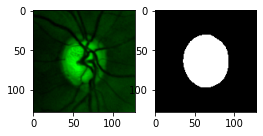

In [13]:
num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [14]:
model_disc = create_compile_model(img_size)

history_disc = train(green_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_green', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 41s 397ms/step - loss: 0.9954 - mean_IOU_gpu: 0.1164 - dice_metric: 0.2078 - val_loss: 1.0013 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 39s 397ms/step - loss: 1.0137 - mean_IOU_gpu: 0.0475 - dice_metric: 0.0896 - val_loss: 0.9884 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 39s 399ms/step - loss: 1.0073 - mean_IOU_gpu: 0.0171 - dice_metric: 0.0334 - val_loss: 0.9723 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 40s 400ms/step - loss: 0.9566 - mean_IOU_gpu: 0.0168 - dice_metric: 0.0327 - val_loss: 0.9538 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 38s 386ms/step - loss: 0.9658 - mean_IOU_gpu: 0.0460 - dice_metric: 0.0857 - val_loss: 0.9264 - val_mean_IOU_gpu: 0

99/99 [==============================] - 39s 393ms/step - loss: 0.1163 - mean_IOU_gpu: 0.7695 - dice_metric: 0.8658 - val_loss: 3.2045 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1184 - mean_IOU_gpu: 0.7626 - dice_metric: 0.8617 - val_loss: 2.6791 - val_mean_IOU_gpu: 0.0023 - val_dice_metric: 0.0044
Epoch 43/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1175 - mean_IOU_gpu: 0.7669 - dice_metric: 0.8645 - val_loss: 1.8699 - val_mean_IOU_gpu: 0.0241 - val_dice_metric: 0.0418
Epoch 44/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1112 - mean_IOU_gpu: 0.7743 - dice_metric: 0.8697 - val_loss: 1.8910 - val_mean_IOU_gpu: 0.0329 - val_dice_metric: 0.0563
Epoch 45/500
99/99 [==============================] - 38s 388ms/step - loss: 0.1054 - mean_IOU_gpu: 0.7853 - dice_metric: 0.8766 - val_loss: 1.4406 - val_mean_IOU_gpu: 0.0678 - val_dice_metric: 0.1107


Epoch 82/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0950 - mean_IOU_gpu: 0.7989 - dice_metric: 0.8861 - val_loss: 0.3883 - val_mean_IOU_gpu: 0.4362 - val_dice_metric: 0.5914
Epoch 83/500
99/99 [==============================] - 38s 387ms/step - loss: 0.1000 - mean_IOU_gpu: 0.7921 - dice_metric: 0.8812 - val_loss: 1.1272 - val_mean_IOU_gpu: 0.0918 - val_dice_metric: 0.1518
Epoch 84/500
99/99 [==============================] - 39s 393ms/step - loss: 0.0834 - mean_IOU_gpu: 0.8202 - dice_metric: 0.8996 - val_loss: 1.1324 - val_mean_IOU_gpu: 0.1076 - val_dice_metric: 0.1747
Epoch 85/500
99/99 [==============================] - 39s 392ms/step - loss: 0.0914 - mean_IOU_gpu: 0.8088 - dice_metric: 0.8916 - val_loss: 1.9412 - val_mean_IOU_gpu: 0.0208 - val_dice_metric: 0.0373
Epoch 86/500
99/99 [==============================] - 40s 401ms/step - loss: 0.0898 - mean_IOU_gpu: 0.8079 - dice_metric: 0.8916 - val_loss: 0.7605 - val_mean_IOU_gpu: 0.2126 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0755 - mean_IOU_gpu: 0.8329 - dice_metric: 0.9076 - val_loss: 0.2460 - val_mean_IOU_gpu: 0.5890 - val_dice_metric: 0.7344
Epoch 124/500
99/99 [==============================] - 40s 403ms/step - loss: 0.0751 - mean_IOU_gpu: 0.8343 - dice_metric: 0.9083 - val_loss: 0.2621 - val_mean_IOU_gpu: 0.5707 - val_dice_metric: 0.7197
Epoch 125/500
99/99 [==============================] - 39s 397ms/step - loss: 0.0768 - mean_IOU_gpu: 0.8316 - dice_metric: 0.9067 - val_loss: 0.5828 - val_mean_IOU_gpu: 0.3346 - val_dice_metric: 0.4882
Epoch 126/500
99/99 [==============================] - 39s 396ms/step - loss: 0.0802 - mean_IOU_gpu: 0.8272 - dice_metric: 0.9032 - val_loss: 0.7909 - val_mean_IOU_gpu: 0.2326 - val_dice_metric: 0.3648
Epoch 127/500
99/99 [==============================] - 41s 410ms/step - loss: 0.0820 - mean_IOU_gpu: 0.8225 - dice_metric: 0.9004 - val_loss: 0.1838 - val_mean_IOU_gpu: 0.6628 - val_dice_metri

99/99 [==============================] - 43s 432ms/step - loss: 0.0673 - mean_IOU_gpu: 0.8475 - dice_metric: 0.9163 - val_loss: 0.1880 - val_mean_IOU_gpu: 0.6616 - val_dice_metric: 0.7911
Epoch 164/500
99/99 [==============================] - 43s 436ms/step - loss: 0.0740 - mean_IOU_gpu: 0.8354 - dice_metric: 0.9088 - val_loss: 0.2319 - val_mean_IOU_gpu: 0.6090 - val_dice_metric: 0.7507
Epoch 165/500
99/99 [==============================] - 45s 453ms/step - loss: 0.0744 - mean_IOU_gpu: 0.8353 - dice_metric: 0.9090 - val_loss: 0.2260 - val_mean_IOU_gpu: 0.6186 - val_dice_metric: 0.7582
Epoch 166/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0667 - mean_IOU_gpu: 0.8478 - dice_metric: 0.9168 - val_loss: 0.2989 - val_mean_IOU_gpu: 0.5464 - val_dice_metric: 0.6981
Epoch 167/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0673 - mean_IOU_gpu: 0.8474 - dice_metric: 0.9162 - val_loss: 0.3343 - val_mean_IOU_gpu: 0.5158 - val_dice_metric: 0.6711
Epoc

Epoch 204/500
99/99 [==============================] - 42s 420ms/step - loss: 0.1122 - mean_IOU_gpu: 0.7743 - dice_metric: 0.8694 - val_loss: 0.1732 - val_mean_IOU_gpu: 0.6799 - val_dice_metric: 0.8041
Epoch 205/500
99/99 [==============================] - 42s 422ms/step - loss: 0.1061 - mean_IOU_gpu: 0.7851 - dice_metric: 0.8765 - val_loss: 0.7237 - val_mean_IOU_gpu: 0.2899 - val_dice_metric: 0.4313
Epoch 206/500
99/99 [==============================] - 42s 426ms/step - loss: 0.0877 - mean_IOU_gpu: 0.8119 - dice_metric: 0.8946 - val_loss: 0.5219 - val_mean_IOU_gpu: 0.3855 - val_dice_metric: 0.5401
Epoch 207/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0825 - mean_IOU_gpu: 0.8203 - dice_metric: 0.8997 - val_loss: 0.4121 - val_mean_IOU_gpu: 0.4584 - val_dice_metric: 0.6142
Epoch 208/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0856 - mean_IOU_gpu: 0.8145 - dice_metric: 0.8958 - val_loss: 1.6552 - val_mean_IOU_gpu: 0.0484 - val_dice_metri

99/99 [==============================] - 41s 417ms/step - loss: 0.0635 - mean_IOU_gpu: 0.8538 - dice_metric: 0.9203 - val_loss: 0.1003 - val_mean_IOU_gpu: 0.7949 - val_dice_metric: 0.8828
Epoch 245/500
99/99 [==============================] - 41s 411ms/step - loss: 0.0692 - mean_IOU_gpu: 0.8444 - dice_metric: 0.9141 - val_loss: 0.0920 - val_mean_IOU_gpu: 0.8074 - val_dice_metric: 0.8911
Epoch 246/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0739 - mean_IOU_gpu: 0.8365 - dice_metric: 0.9095 - val_loss: 0.1010 - val_mean_IOU_gpu: 0.7929 - val_dice_metric: 0.8816
Epoch 247/500
99/99 [==============================] - 43s 433ms/step - loss: 0.0680 - mean_IOU_gpu: 0.8459 - dice_metric: 0.9155 - val_loss: 0.1462 - val_mean_IOU_gpu: 0.7215 - val_dice_metric: 0.8343
Epoch 248/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0676 - mean_IOU_gpu: 0.8467 - dice_metric: 0.9159 - val_loss: 0.1346 - val_mean_IOU_gpu: 0.7381 - val_dice_metric: 0.8456
Epoc

Epoch 285/500
99/99 [==============================] - 42s 423ms/step - loss: 0.0584 - mean_IOU_gpu: 0.8640 - dice_metric: 0.9263 - val_loss: 0.0787 - val_mean_IOU_gpu: 0.8342 - val_dice_metric: 0.9075
Epoch 286/500
99/99 [==============================] - 42s 420ms/step - loss: 0.0599 - mean_IOU_gpu: 0.8623 - dice_metric: 0.9252 - val_loss: 0.1086 - val_mean_IOU_gpu: 0.7833 - val_dice_metric: 0.8754
Epoch 287/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0647 - mean_IOU_gpu: 0.8525 - dice_metric: 0.9194 - val_loss: 0.0775 - val_mean_IOU_gpu: 0.8382 - val_dice_metric: 0.9097
Epoch 288/500
99/99 [==============================] - 41s 415ms/step - loss: 0.0659 - mean_IOU_gpu: 0.8497 - dice_metric: 0.9176 - val_loss: 0.2512 - val_mean_IOU_gpu: 0.6030 - val_dice_metric: 0.7452
Epoch 289/500
99/99 [==============================] - 42s 419ms/step - loss: 0.0624 - mean_IOU_gpu: 0.8573 - dice_metric: 0.9221 - val_loss: 0.0691 - val_mean_IOU_gpu: 0.8518 - val_dice_metri

99/99 [==============================] - 42s 428ms/step - loss: 0.0588 - mean_IOU_gpu: 0.8629 - dice_metric: 0.9256 - val_loss: 0.0669 - val_mean_IOU_gpu: 0.8566 - val_dice_metric: 0.9209
Epoch 326/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0593 - mean_IOU_gpu: 0.8619 - dice_metric: 0.9250 - val_loss: 0.0828 - val_mean_IOU_gpu: 0.8304 - val_dice_metric: 0.9049
Epoch 327/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0599 - mean_IOU_gpu: 0.8612 - dice_metric: 0.9247 - val_loss: 0.0762 - val_mean_IOU_gpu: 0.8406 - val_dice_metric: 0.9111
Epoch 328/500
99/99 [==============================] - 41s 420ms/step - loss: 0.0636 - mean_IOU_gpu: 0.8540 - dice_metric: 0.9203 - val_loss: 0.0844 - val_mean_IOU_gpu: 0.8282 - val_dice_metric: 0.9034
Epoch 329/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0596 - mean_IOU_gpu: 0.8634 - dice_metric: 0.9257 - val_loss: 0.0938 - val_mean_IOU_gpu: 0.8087 - val_dice_metric: 0.8915
Epoc

Epoch 366/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0533 - mean_IOU_gpu: 0.8742 - dice_metric: 0.9322 - val_loss: 0.0662 - val_mean_IOU_gpu: 0.8567 - val_dice_metric: 0.9210
Epoch 367/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0516 - mean_IOU_gpu: 0.8785 - dice_metric: 0.9344 - val_loss: 0.0676 - val_mean_IOU_gpu: 0.8556 - val_dice_metric: 0.9204
Epoch 368/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0586 - mean_IOU_gpu: 0.8631 - dice_metric: 0.9257 - val_loss: 0.0609 - val_mean_IOU_gpu: 0.8662 - val_dice_metric: 0.9268
Epoch 369/500
99/99 [==============================] - 41s 419ms/step - loss: 0.0569 - mean_IOU_gpu: 0.8672 - dice_metric: 0.9280 - val_loss: 0.0635 - val_mean_IOU_gpu: 0.8607 - val_dice_metric: 0.9234
Epoch 370/500
99/99 [==============================] - 42s 423ms/step - loss: 0.0581 - mean_IOU_gpu: 0.8644 - dice_metric: 0.9264 - val_loss: 0.0847 - val_mean_IOU_gpu: 0.8278 - val_dice_metri

99/99 [==============================] - 42s 427ms/step - loss: 0.0567 - mean_IOU_gpu: 0.8669 - dice_metric: 0.9280 - val_loss: 0.0772 - val_mean_IOU_gpu: 0.8400 - val_dice_metric: 0.9106
Epoch 407/500
99/99 [==============================] - 41s 420ms/step - loss: 0.0562 - mean_IOU_gpu: 0.8692 - dice_metric: 0.9292 - val_loss: 0.0701 - val_mean_IOU_gpu: 0.8512 - val_dice_metric: 0.9175
Epoch 408/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0577 - mean_IOU_gpu: 0.8652 - dice_metric: 0.9269 - val_loss: 0.0892 - val_mean_IOU_gpu: 0.8219 - val_dice_metric: 0.8993
Epoch 409/500
99/99 [==============================] - 42s 423ms/step - loss: 0.0611 - mean_IOU_gpu: 0.8589 - dice_metric: 0.9231 - val_loss: 0.0687 - val_mean_IOU_gpu: 0.8523 - val_dice_metric: 0.9182
Epoch 410/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0528 - mean_IOU_gpu: 0.8752 - dice_metric: 0.9328 - val_loss: 0.0690 - val_mean_IOU_gpu: 0.8534 - val_dice_metric: 0.9189
Epoc

Epoch 447/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0573 - mean_IOU_gpu: 0.8658 - dice_metric: 0.9271 - val_loss: 0.0688 - val_mean_IOU_gpu: 0.8473 - val_dice_metric: 0.9152
Epoch 448/500
99/99 [==============================] - 42s 426ms/step - loss: 0.0514 - mean_IOU_gpu: 0.8772 - dice_metric: 0.9342 - val_loss: 0.0663 - val_mean_IOU_gpu: 0.8562 - val_dice_metric: 0.9205
Epoch 449/500
99/99 [==============================] - 43s 440ms/step - loss: 0.0563 - mean_IOU_gpu: 0.8680 - dice_metric: 0.9285 - val_loss: 0.0645 - val_mean_IOU_gpu: 0.8557 - val_dice_metric: 0.9202
Epoch 450/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0505 - mean_IOU_gpu: 0.8806 - dice_metric: 0.9358 - val_loss: 0.0657 - val_mean_IOU_gpu: 0.8584 - val_dice_metric: 0.9217
Epoch 451/500
99/99 [==============================] - 43s 432ms/step - loss: 0.0514 - mean_IOU_gpu: 0.8784 - dice_metric: 0.9347 - val_loss: 0.0637 - val_mean_IOU_gpu: 0.8583 - val_dice_metri

99/99 [==============================] - 41s 420ms/step - loss: 0.0540 - mean_IOU_gpu: 0.8719 - dice_metric: 0.9309 - val_loss: 0.0722 - val_mean_IOU_gpu: 0.8405 - val_dice_metric: 0.9111
Epoch 488/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0514 - mean_IOU_gpu: 0.8783 - dice_metric: 0.9345 - val_loss: 0.0688 - val_mean_IOU_gpu: 0.8476 - val_dice_metric: 0.9154
Epoch 489/500
99/99 [==============================] - 42s 423ms/step - loss: 0.0542 - mean_IOU_gpu: 0.8715 - dice_metric: 0.9306 - val_loss: 0.0782 - val_mean_IOU_gpu: 0.8393 - val_dice_metric: 0.9101
Epoch 490/500
99/99 [==============================] - 38s 384ms/step - loss: 0.0541 - mean_IOU_gpu: 0.8730 - dice_metric: 0.9314 - val_loss: 0.0653 - val_mean_IOU_gpu: 0.8566 - val_dice_metric: 0.9207
Epoch 491/500
99/99 [==============================] - 33s 335ms/step - loss: 0.0549 - mean_IOU_gpu: 0.8709 - dice_metric: 0.9301 - val_loss: 0.0696 - val_mean_IOU_gpu: 0.8510 - val_dice_metric: 0.9173
Epoc

image #0


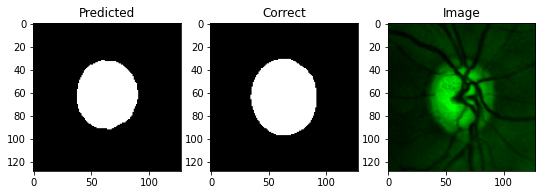

IOU: 0.8329959511756897
Dice: 0.9088901159580343
image #1


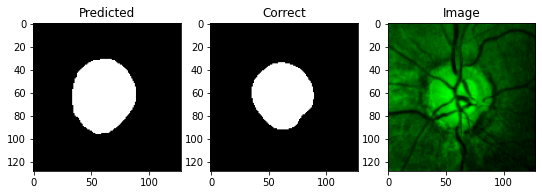

IOU: 0.8356858491897583
Dice: 0.9104889589905363
image #2


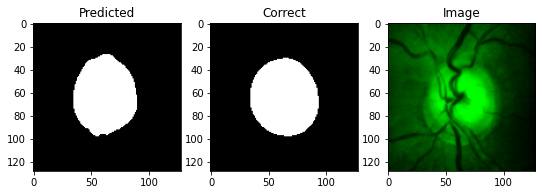

IOU: 0.8697517514228821
Dice: 0.9303392886412064
image #3


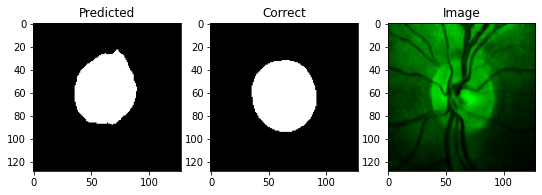

IOU: 0.7963587045669556
Dice: 0.8866366366366366
image #4


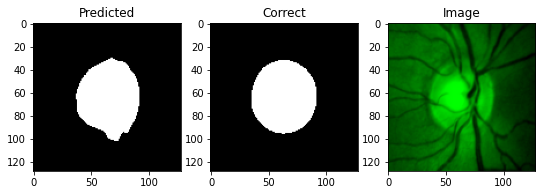

IOU: 0.8829575777053833
Dice: 0.9378411692199331
image #5


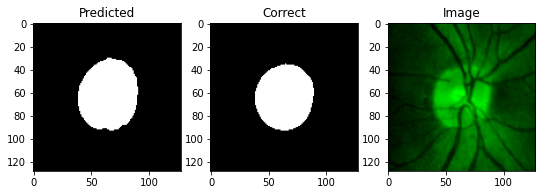

IOU: 0.8866822719573975
Dice: 0.939938080495356
image #6


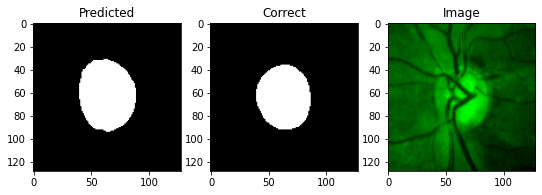

IOU: 0.8593814373016357
Dice: 0.9243734752716789
image #7


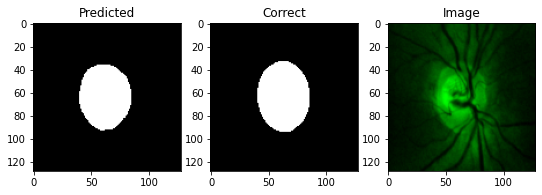

IOU: 0.8970189690589905
Dice: 0.9457142857142857
image #8


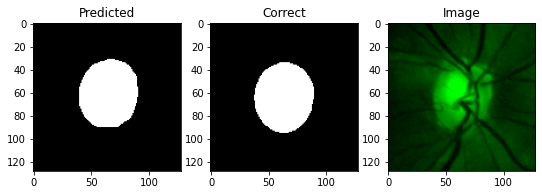

IOU: 0.8644841909408569
Dice: 0.9273172723560636
image #9


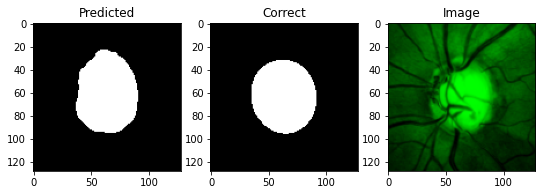

IOU: 0.8724489808082581
Dice: 0.9318801089918256
image #10


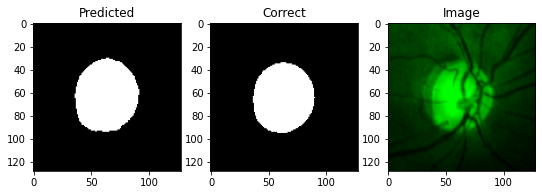

IOU: 0.9086987972259521
Dice: 0.952165725047081
image #11


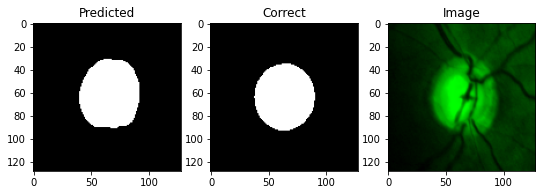

IOU: 0.8559577465057373
Dice: 0.9223892726533929
image #12


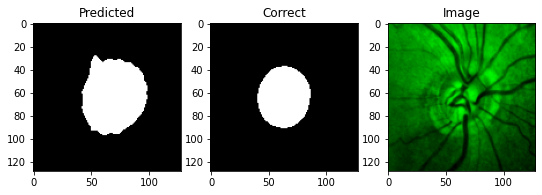

IOU: 0.6319490671157837
Dice: 0.7744715780833162
image #13


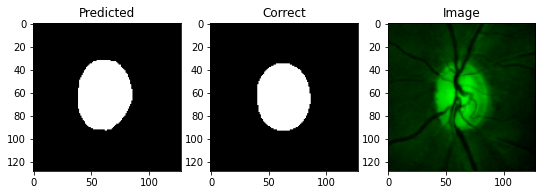

IOU: 0.8544542193412781
Dice: 0.9215155615696887
image #14


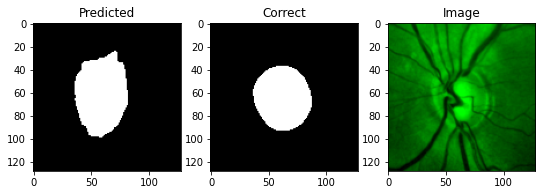

IOU: 0.7024999856948853
Dice: 0.8252569750367107
image #15


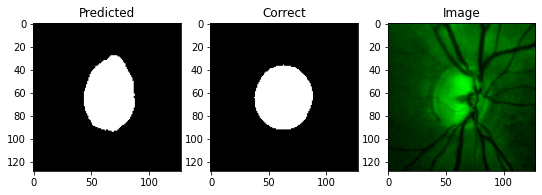

IOU: 0.8064383268356323
Dice: 0.89284898332191
image #16


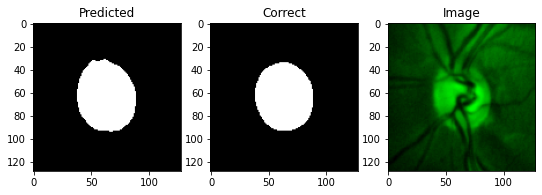

IOU: 0.9298176169395447
Dice: 0.9636326279021985
image #17


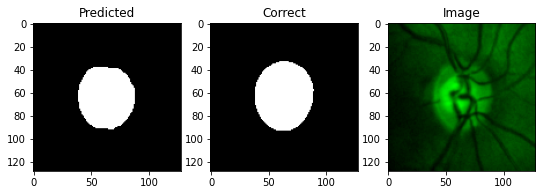

IOU: 0.889305055141449
Dice: 0.9414096916299559
image #18


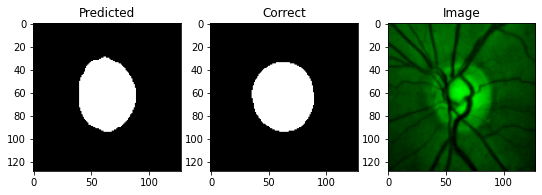

IOU: 0.891871452331543
Dice: 0.9428457234212629
image #19


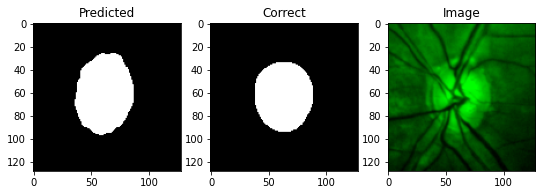

IOU: 0.8124128580093384
Dice: 0.8964986533282031
image #20


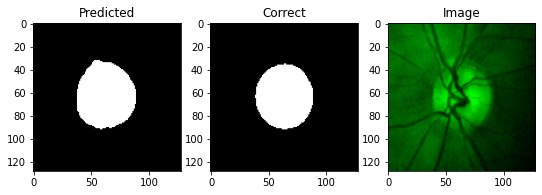

IOU: 0.8968815207481384
Dice: 0.94563787812363
image #21


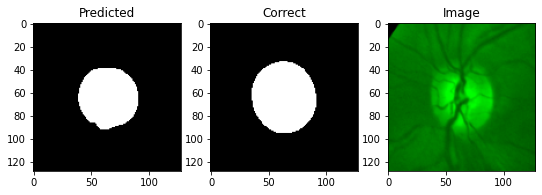

IOU: 0.7930530309677124
Dice: 0.884584013050571
image #22


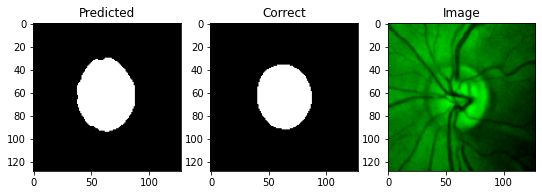

IOU: 0.8493485450744629
Dice: 0.9185380889476001
image #23


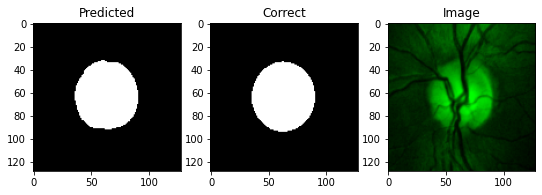

IOU: 0.9587901830673218
Dice: 0.9789615904265586
image #24


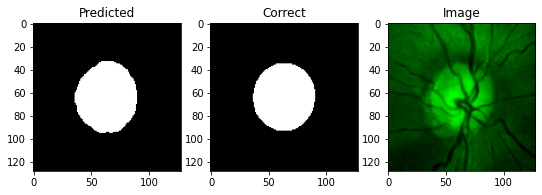

IOU: 0.9372128844261169
Dice: 0.9675889328063241
image #25


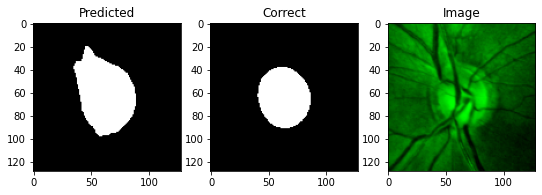

IOU: 0.6929598450660706
Dice: 0.8186370563901589
image #26


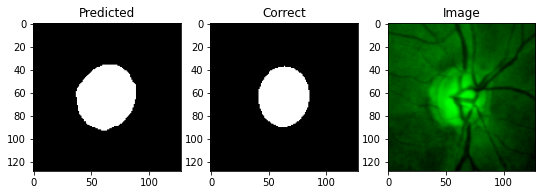

IOU: 0.8048997521400452
Dice: 0.8919052319842053
image #27


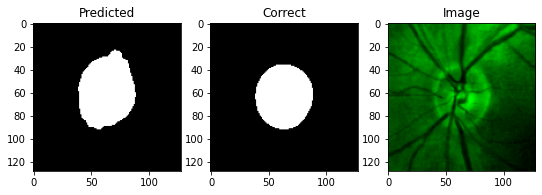

IOU: 0.8030651211738586
Dice: 0.890777730556736
image #28


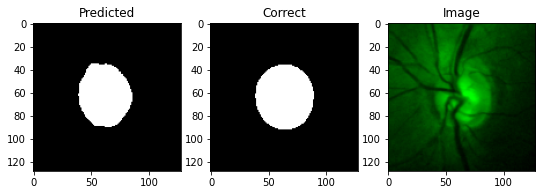

IOU: 0.8322497010231018
Dice: 0.9084457061745919
image #29


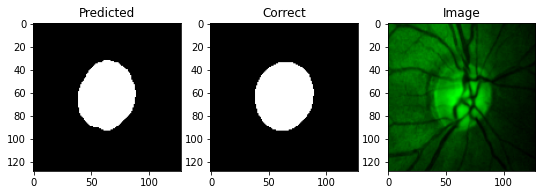

IOU: 0.9401993155479431
Dice: 0.9691780821917808
image #30


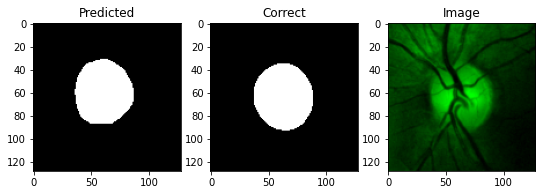

IOU: 0.8032979965209961
Dice: 0.8909209666884389
image #31


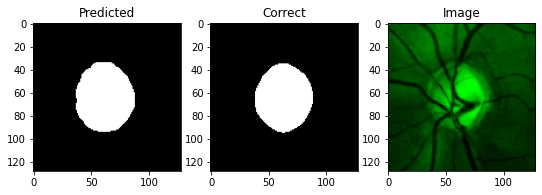

IOU: 0.8961196541786194
Dice: 0.9452142400341078
image #32


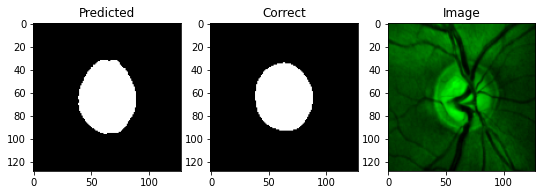

IOU: 0.9139179587364197
Dice: 0.9550231189575452
image #33


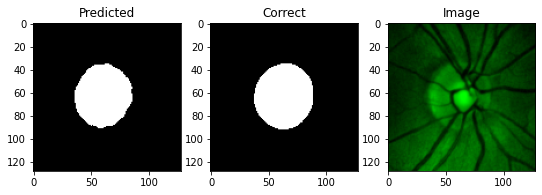

IOU: 0.8321532607078552
Dice: 0.9083882700613776
image #34


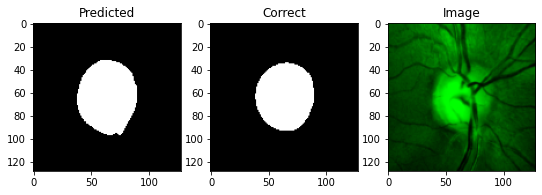

IOU: 0.8962228298187256
Dice: 0.9452716297786721
image #35


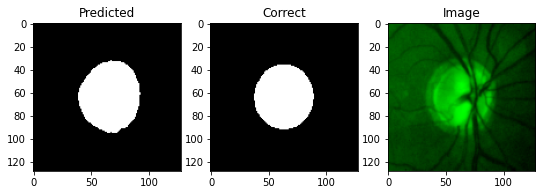

IOU: 0.8409961462020874
Dice: 0.9136316337148803
image #36


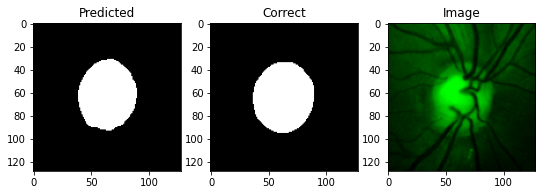

IOU: 0.9000383019447327
Dice: 0.947389639185648
image #37


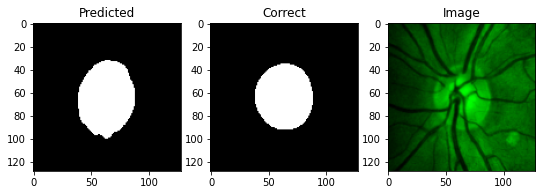

IOU: 0.8671600818634033
Dice: 0.9288545795952431
image #38


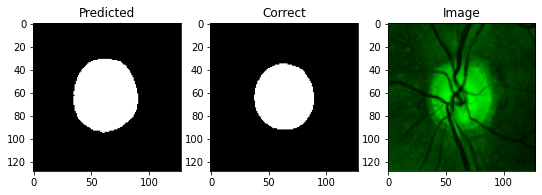

IOU: 0.8299005627632141
Dice: 0.907044440131962
image #39


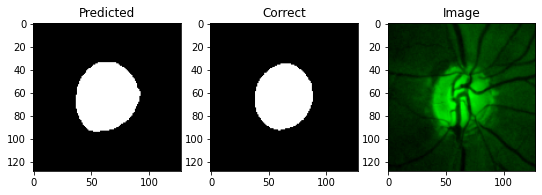

IOU: 0.865556001663208
Dice: 0.9279335410176531
image #40


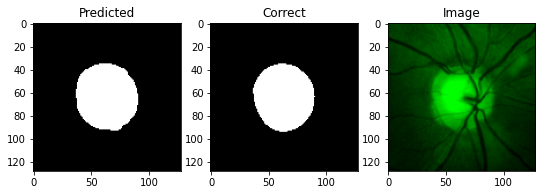

IOU: 0.9496431350708008
Dice: 0.9741712426276184
image #41


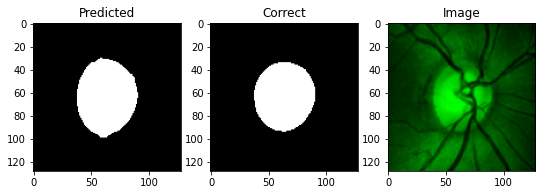

IOU: 0.897735595703125
Dice: 0.9461123941493457
image #42


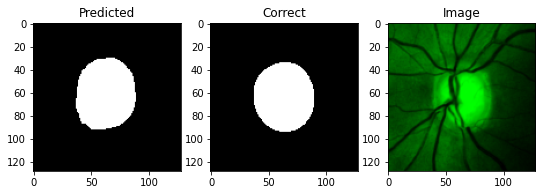

IOU: 0.8635371327400208
Dice: 0.9267721148213239
image #43


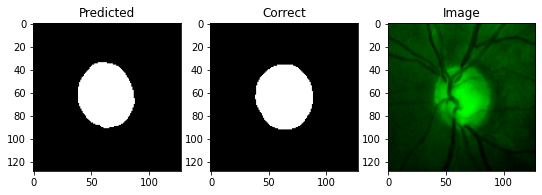

IOU: 0.9061815142631531
Dice: 0.9507819687212512
image #44


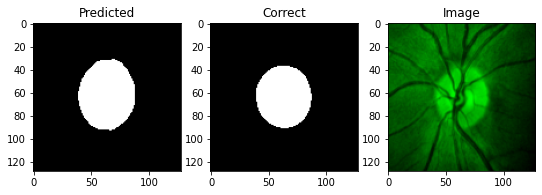

IOU: 0.8681972622871399
Dice: 0.9294492489758762
image #45


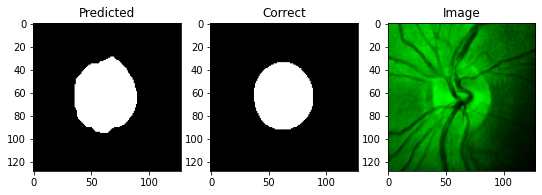

IOU: 0.8800148367881775
Dice: 0.9361786208259237
image #46


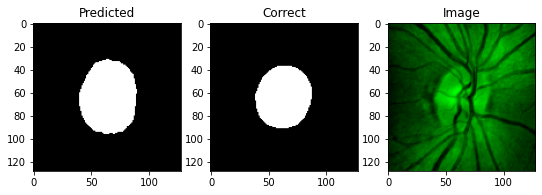

IOU: 0.8099883198738098
Dice: 0.895020478551412
image #47


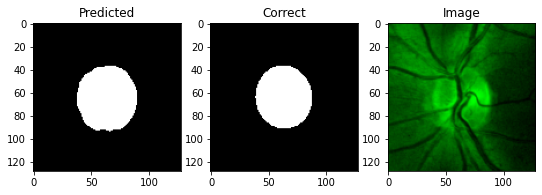

IOU: 0.88165682554245
Dice: 0.9371069182389937
image #48


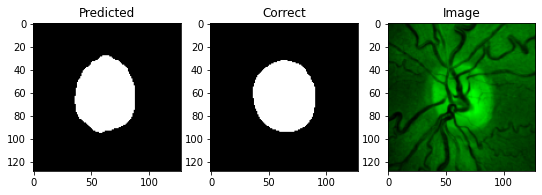

IOU: 0.8790550231933594
Dice: 0.9356352036029274
image #49


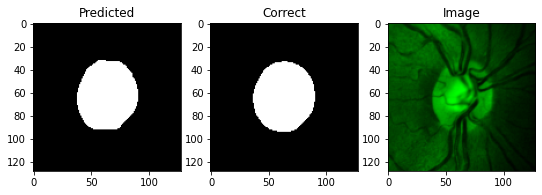

IOU: 0.9450381398200989
Dice: 0.9717425431711146
image #50


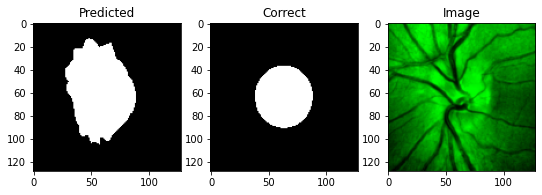

IOU: 0.5572559237480164
Dice: 0.7156895967468655


In [15]:
pred_iou, pred_dice, pred_disc = predict(green_channel_test, X_test, Z_test, model_disc, img_size)

In [16]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.85242146
0.9184125663631296


### Cálculo do CDR

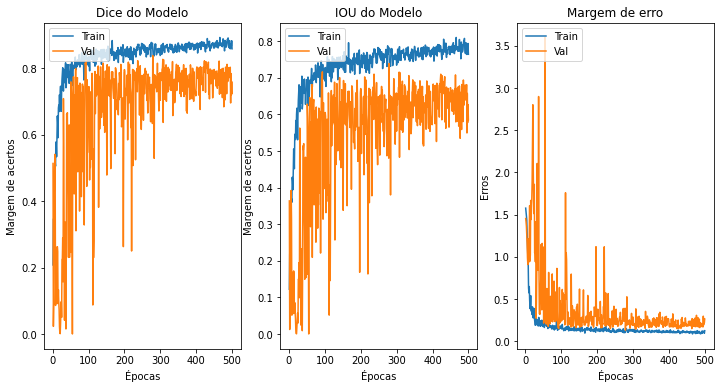

In [17]:
plot_results(history_cup, epochs)

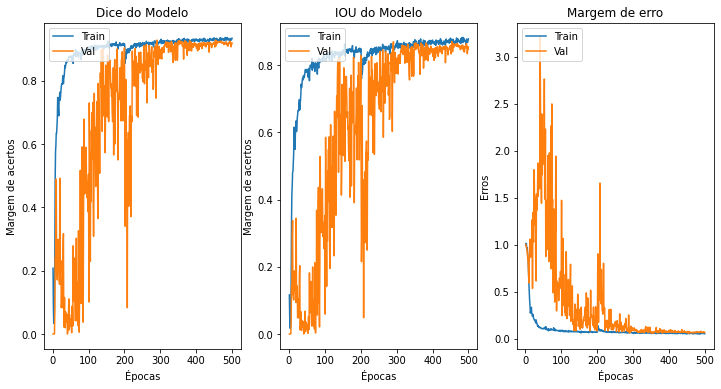

In [18]:
plot_results(history_disc, epochs)

In [20]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.6825669333534746
image #1 - cdr = 0.6646471886066139
image #2 - cdr = 0.6684390718297677
image #3 - cdr = 0.4051885161970592
image #4 - cdr = 0.4363176492261676
image #5 - cdr = 0.4621291695955616
image #6 - cdr = 0.6438615657299825
image #7 - cdr = 0.3959973554242073
image #8 - cdr = 0.523186065228227
image #9 - cdr = 0.6325964260896866
image #10 - cdr = 0.6346567238907704
image #11 - cdr = 0.6086328651996429
image #12 - cdr = 0.5683816421748612
image #13 - cdr = 0.5855065416724828
image #14 - cdr = 0.5405227177229143
image #15 - cdr = 0.554897284256154
image #16 - cdr = 0.5731971594250956
image #17 - cdr = 0.5328028315645261
image #18 - cdr = 0.5487131303951218
image #19 - cdr = 0.6325362436980775
image #20 - cdr = 0.5538264038284462
image #21 - cdr = 0.43620440867992094
image #22 - cdr = 0.6149698740908711
image #23 - cdr = 0.5664650243860536
image #24 - cdr = 0.6111798209726386
image #25 - cdr = 0.46480425086370397
image #26 - cdr = 0.583349267605044
image #27 - 

In [21]:
pd.DataFrame(data= result)

cdr      area
0   0.682567  0.369785
1   0.664647  0.425300
2   0.668439  0.395396
3   0.405189  0.184037
4   0.436318  0.214311
5   0.462129  0.240813
6   0.643862  0.386045
7   0.395997  0.160059
8   0.523186  0.278736
9   0.632596  0.385710
10  0.634657  0.366473
11  0.608633  0.299333
12  0.568382  0.322832
13  0.585507  0.331574
14  0.540523  0.304450
15  0.554897  0.258566
16  0.573197  0.345324
17  0.532803  0.264389
18  0.548713  0.311482
19  0.632536  0.394060
20  0.553826  0.305897
21  0.436204  0.157676
22  0.614970  0.383143
23  0.566465  0.299343
24  0.611180  0.333850
25  0.464804  0.279027
26  0.583349  0.322494
27  0.377485  0.179354
28  0.315693  0.096709
29  0.531416  0.299913
30  0.476672  0.220992
31  0.666132  0.405215
32  0.594960  0.355574
33  0.265396  0.074775
34  0.625311  0.372609
35  0.653881  0.341837
36  0.577925  0.336650
37  0.506486  0.267460
38  0.660872  0.389837
39  0.656151  0.387834
40  0.630145  0.342570
41  0.600627  0.347074
42  0.658922  0.384350
43  0.541737  0.244869
44  0.531002  0.291241
45  0.391475  0.170387
46  0.409462  0.189953
47  0.487056  0.237691
48  0.620706  0.365002
49  0.526368  0.260561
50  0.365048  0.134636

In [22]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   28.835733  40.609814  53.096233  59.495724
1   35.118320  42.896214  54.899578  64.539825
2   32.483875  46.088989  55.126427  68.950172
3   23.985037  25.626877  52.681843  63.246799
4   26.609800  29.417141  54.729683  67.421387
5   27.171333  29.194344  51.873924  63.173557
6   29.596422  40.556183  49.316917  62.988979
7   18.333586  22.683920  45.196785  57.283009
8   27.628235  31.620235  51.456573  60.437840
9   32.771931  45.763756  53.912731  72.342735
10  31.962330  40.637161  55.114853  64.030144
11  25.923492  37.616489  52.755756  61.804893
12  31.851097  38.826786  56.675030  68.311119
13  26.848598  36.242054  47.161240  61.898632
14  25.423845  39.178429  46.024483  72.482483
15  20.355106  35.916225  43.686684  64.725899
16  30.714108  36.109035  50.828682  62.995838
17  24.585735  29.436466  49.550831  55.248329
18  28.169790  34.791451  49.658920  63.405537
19  31.216423  44.785522  50.001266  70.803093
20  28.511333  32.532364  51.796032  58.741085
21  18.929153  23.342510  51.927322  53.512779
22  31.268068  38.772572  49.927521  63.047920
23  29.235273  33.960480  55.139294  59.951591
24  29.223696  37.868160  53.442947  61.959114
25  27.613050  35.311726  48.082180  75.971176
26  27.705431  33.482288  50.232510  57.396641
27  23.137840  25.107199  48.787785  66.511696
28  13.998563  17.552919  45.684006  55.601173
29  27.721584  32.065208  49.102528  60.339134
30  23.815813  27.018614  51.116905  56.681828
31  31.209101  40.453308  51.070370  60.728638
32  29.614889  38.137978  49.163475  64.101746
33  13.798411  14.649016  49.232025  55.196785
34  30.636755  40.712765  51.694599  65.108009
35  27.586525  40.504410  52.819153  61.944645
36  29.287338  35.446407  50.364853  61.333897
37  25.723955  33.642250  48.721291  66.422867
38  33.229958  42.382874  56.188263  64.131783
39  31.686569  40.330544  54.082172  61.465359
40  29.387676  37.252331  53.881454  59.117043
41  30.301632  40.113258  52.379017  66.785667
42  30.746328  41.955666  52.425014  63.673157
43  21.727173  30.899923  48.219044  57.038616
44  26.937117  32.712688  48.894989  61.605595
45  23.750359  24.823629  54.581558  63.410503
46  23.293501  26.792950  49.871902  65.434456
47  25.651106  27.959675  52.546413  57.405518
48  30.753164  40.518658  52.405575  65.278305
49  26.177263  32.523567  52.509556  61.788651
50  22.488276  31.634935  57.002037  86.659615